In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from env.gridworld_env import CliffWalkingWapper

In [20]:
class Config:
    def __init__(self):
        self.policy_lr = 0.01
        self.gamma = 0.8
        self.train_eps = 500
        self.epsilon = 0.1
cfg = Config()

In [25]:
"""Agent"""
class QLearning:
    def __init__(self, state_dim, action_dim, cfg):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.lr = cfg.policy_lr
        self.gamma = cfg.gamma
        self.epsilon = cfg.epsilon
        self.q_table = np.zeros((self.state_dim, self.action_dim)) # (state_dim, action_dim)
    def update(self, state, action, reward, next_state, done):
        if done:
            self.q_table[state][action] = reward
            return
        q_value = self.q_table[state][action] 
        delta = reward + self.gamma * np.max(self.q_table[next_state]) - q_value
        self.q_table[state][action] += self.lr * delta 
        return
    def choose_action(self, state):
        if np.random.uniform(0, 1) > self.epsilon:
            action = np.argmax(self.q_table[state])
        else:
            action = np.random.choice(self.action_dim) 
        return action # 0~3

In [24]:
'''初始化环境'''  
env = gym.make("CliffWalking-v0")  # 0 up, 1 right, 2 down, 3 left
env = CliffWalkingWapper(env)
agent = QLearning(
    state_dim=env.observation_space.n,
    action_dim=env.action_space.n,
    cfg=cfg
    )
rewards = []  
ma_rewards = [] # moving average reward
for i_ep in range(cfg.train_eps): # train_eps: 训练的最大episodes数
    ep_reward = 0  # 记录每个episode的reward
    state = env.reset()  # 重置环境, 重新开一局（即开始新的一个episode）
    while True:
        action = agent.choose_action(state)  # 根据算法选择一个动作
        next_state, reward, done, _ = env.step(action)  # 与环境进行一次动作交互
        agent.update(state, action, reward, next_state, done)  # Q-learning算法更新
        state = next_state  # 存储上一个观察值
        ep_reward += reward
        if done:
            break
    rewards.append(ep_reward)
    if ma_rewards:
        ma_rewards.append(ma_rewards[-1]*0.9+ep_reward*0.1)
    else:
        ma_rewards.append(ep_reward)
    print("Episode:{}/{}: reward:{:.1f}".format(i_ep+1, cfg.train_eps,ep_reward))

Episode:1/500: reward:-96.0
Episode:2/500: reward:-9058.0
Episode:3/500: reward:-3687.0
Episode:4/500: reward:-867.0
Episode:5/500: reward:-1614.0
Episode:6/500: reward:-2081.0
Episode:7/500: reward:-4917.0
Episode:8/500: reward:-354.0
Episode:9/500: reward:-1870.0
Episode:10/500: reward:-481.0
Episode:11/500: reward:-1689.0
Episode:12/500: reward:-1940.0
Episode:13/500: reward:-3439.0
Episode:14/500: reward:-1367.0
Episode:15/500: reward:-3417.0
Episode:16/500: reward:-415.0
Episode:17/500: reward:-740.0
Episode:18/500: reward:-229.0
Episode:19/500: reward:-376.0
Episode:20/500: reward:-748.0
Episode:21/500: reward:-154.0
Episode:22/500: reward:-967.0
Episode:23/500: reward:-433.0
Episode:24/500: reward:-79.0
Episode:25/500: reward:-523.0
Episode:26/500: reward:-749.0
Episode:27/500: reward:-262.0
Episode:28/500: reward:-178.0
Episode:29/500: reward:-314.0
Episode:30/500: reward:-168.0
Episode:31/500: reward:-288.0
Episode:32/500: reward:-47.0
Episode:33/500: reward:-450.0
Episode:34/

Episode:297/500: reward:-344.0
Episode:298/500: reward:-49.0
Episode:299/500: reward:-71.0
Episode:300/500: reward:-323.0
Episode:301/500: reward:-183.0
Episode:302/500: reward:-230.0
Episode:303/500: reward:-62.0
Episode:304/500: reward:-61.0
Episode:305/500: reward:-104.0
Episode:306/500: reward:-32.0
Episode:307/500: reward:-48.0
Episode:308/500: reward:-77.0
Episode:309/500: reward:-51.0
Episode:310/500: reward:-87.0
Episode:311/500: reward:-196.0
Episode:312/500: reward:-74.0
Episode:313/500: reward:-218.0
Episode:314/500: reward:-47.0
Episode:315/500: reward:-60.0
Episode:316/500: reward:-69.0
Episode:317/500: reward:-62.0
Episode:318/500: reward:-48.0
Episode:319/500: reward:-277.0
Episode:320/500: reward:-62.0
Episode:321/500: reward:-51.0
Episode:322/500: reward:-415.0
Episode:323/500: reward:-177.0
Episode:324/500: reward:-46.0
Episode:325/500: reward:-212.0
Episode:326/500: reward:-231.0
Episode:327/500: reward:-36.0
Episode:328/500: reward:-94.0
Episode:329/500: reward:-50.

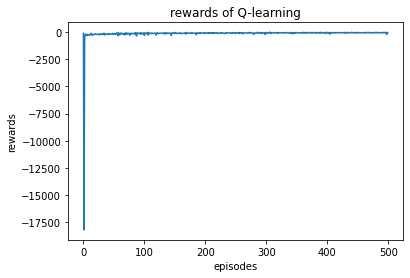

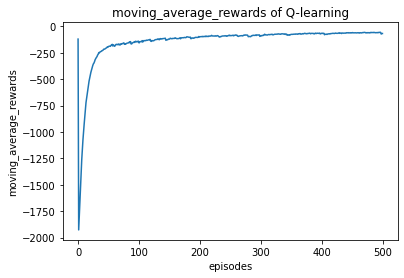

In [5]:
"""Plot"""
def Plot():
    x, y = np.arange(cfg.train_eps), rewards
    plt.plot(x, y)
    plt.title("rewards of Q-learning")
    plt.xlabel("episodes")
    plt.ylabel("rewards")
    plt.show()
    y = ma_rewards
    plt.plot(x, y)
    plt.xlabel("episodes")
    plt.ylabel("moving_average_rewards")
    plt.title("moving_average_rewards of Q-learning")
    plt.show()
    
Plot()

In [8]:
"""Test"""
state = env.reset()
test_reward = 0
while True:
    action = agent.choose_action(state)  # 根据算法选择一个动作
    next_state, reward, done, _ = env.step(action)  # 与环境进行一次动作交互
    agent.update(state, action, reward, next_state, done)  # Q-learning算法更新
    state = next_state  # 存储上一个观察值
    test_reward += reward
    if done:
        break
print("Test Rewards:%f"%test_reward)

Test Rewards:-77.000000
